**Inglés:**

The goal of this code is to **visualize literacy rates** 📊 between **younger people** (aged 15-24) 👩‍🎓👨‍🎓 and **older people** (aged 65+) 👵👴 across different countries 🌍. It uses **data from 2010 to 2016** 🗓️ and creates an interactive plot to compare these two groups of the population 👥. It also shows the **difference in literacy** between continents 🌎, highlighting that **younger people tend to have higher literacy rates** 📚💪 than the older generation! 🙌

---

**Español:**

El objetivo de este código es **visualizar las tasas de alfabetización** 📊 entre las **personas jóvenes** (de 15 a 24 años) 👩‍🎓👨‍🎓 y las **personas mayores** (de 65 años en adelante) 👵👴 en diferentes países 🌍. Utiliza **datos de 2010 a 2016** 🗓️ y crea un gráfico interactivo para comparar estos dos grupos de la población 👥. También muestra la **diferencia en alfabetización** entre continentes 🌎, ¡destacando que **las personas jóvenes suelen tener tasas de alfabetización más altas** 📚💪 que la generación mayor! 🙌

¡Este análisis ayuda a ver cómo las generaciones más jóvenes están más educadas y preparadas! ✨


In [2]:
import pandas as pd
import seaborn as sns

# Leer el archivo CSV que contiene las tasas de alfabetización / Read the CSV file containing literacy rates
df = pd.read_csv('literacy-rates-of-the-the-younger-population-15-24-years-versus-literacy-rates-of-the-older-population-65.csv')
df

Entity      Code   Year  \
0           Abkhazia  OWID_ABK   2015   
1        Afghanistan       AFG   1979   
2        Afghanistan       AFG   2011   
3        Afghanistan       AFG -10000   
4        Afghanistan       AFG  -9000   
...              ...       ...    ...   
56250       Zimbabwe       ZWE   2018   
56251       Zimbabwe       ZWE   2019   
56252       Zimbabwe       ZWE   2020   
56253       Zimbabwe       ZWE   2021   
56254  Åland Islands       ALA   2015   

       Elderly literacy rate, population 65+ years, both sexes (%)  \
0                                                    NaN             
1                                                6.91031             
2                                               20.32185             
3                                                    NaN             
4                                                    NaN             
...                                                  ...             
56250                                                NaN             
56251                                                NaN             
56252                                                NaN             
56253                                                NaN             
56254                                                NaN             

       Youth literacy rate, population 15-24 years, both sexes (%)  \
0                                                    NaN             
1                                              30.066351             
2                                              46.990050             
3                                                    NaN             
4                                                    NaN             
...                                                  ...             
56250                                                NaN             
56251                                                NaN             
56252                                                NaN             
56253                                                NaN             
56254                                                NaN             

       Population (historical estimates) Continent  
0                                    NaN      Asia  
1                             13411060.0       NaN  
2                             30117411.0       NaN  
3                                14737.0       NaN  
4                                20405.0       NaN  
...                                  ...       ...  
56250                         14438812.0       NaN  
56251                         14645473.0       NaN  
56252                         14862927.0       NaN  
56253                         15092171.0       NaN  
56254                                NaN    Europe  

[56255 rows x 7 columns]

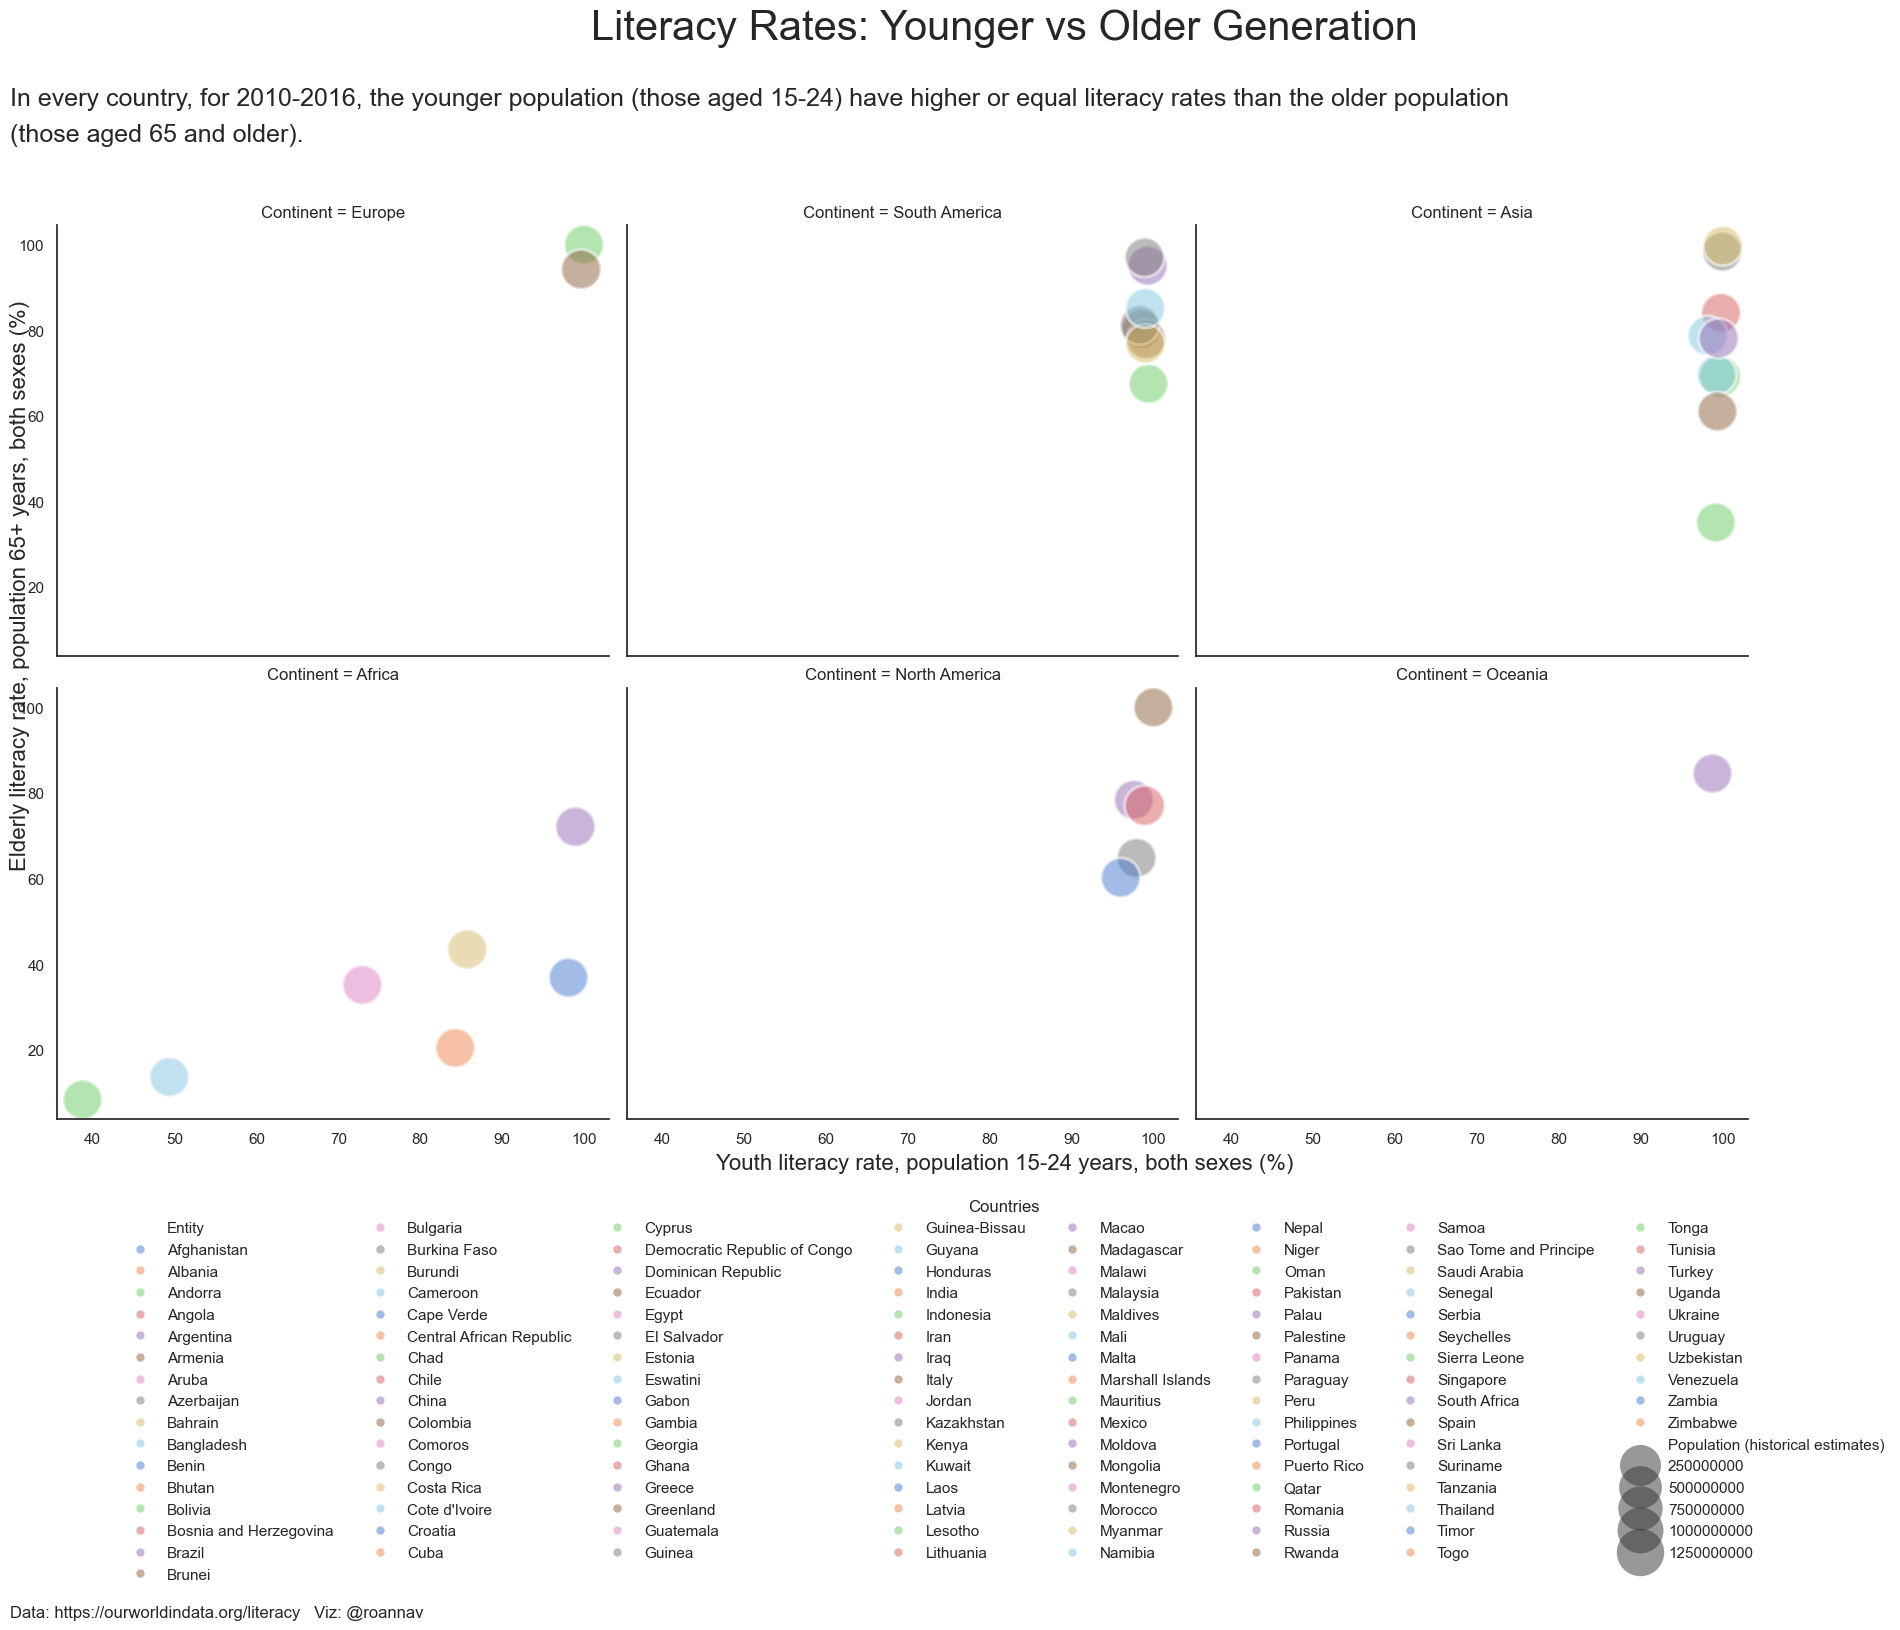

In [3]:
# Eliminar filas con valores nulos en las columnas de tasas de alfabetización de mayores, jóvenes o población /
# Remove rows that have NaN values for elderly literacy rate, youth literacy rate, or population
df = df[df['Elderly literacy rate, population 65+ years, both sexes (%)'].notnull()]
df = df[df['Youth literacy rate, population 15-24 years, both sexes (%)'].notnull()]
df = df[df['Population (historical estimates)'].notnull()]

# Filtrar solo los datos a partir del año 2010 / Filter data for years >= 2010
df = df[df['Year'] >= 2010]

# Establecer un estilo visual blanco para los gráficos / Set a white background theme for the plots
sns.set_theme(style="white")

# Crear un gráfico de dispersión relacionando las tasas de alfabetización de jóvenes y mayores /
# Create a scatter plot relating youth and elderly literacy rates
# Cada gráfico estará separado por continente, se usa el tamaño de la población histórica para el tamaño de los puntos /
# Each plot will be separated by continent, using population size for point size
ax = sns.relplot(
    x='Youth literacy rate, population 15-24 years, both sexes (%)',
    y='Elderly literacy rate, population 65+ years, both sexes (%)',
    hue="Entity",  # Colorear los puntos según el país / Color the points by country
    size="Population (historical estimates)",  # El tamaño del punto según la población / Point size based on historical population
    col="Continent",  # Crear un gráfico por continente / Create a plot for each continent
    col_wrap=3,  # Limitar el número de gráficos por fila / Limit the number of plots per row
    sizes=(800, 1200), alpha=.5, palette="muted",  # Tamaño y transparencia de los puntos / Point size and transparency
    height=6,  # Tamaño de cada gráfico / Height of each plot
    aspect=1.0,  # Proporción del gráfico / Aspect ratio of the plot
    data=df  # Usar el DataFrame filtrado / Use the filtered DataFrame
)

# Mover la leyenda a la parte superior central del gráfico / Move the legend to the upper center of the plot
ax2 = sns.move_legend(
    ax, "upper center", 
    bbox_to_anchor=(.5, 0), ncol=8, title="Countries", frameon=False
)

# Ajustar el título global del gráfico para que no se sobreponga con los gráficos / Adjust the global title so it doesn't overlap with the plots
ax.fig.subplots_adjust(top=.8)
ax.fig.suptitle('Literacy Rates: Younger vs Older Generation', fontsize=30)

# Añadir texto explicativo debajo del título principal / Add explanatory text below the main title
ax.fig.text(0.02, 0.90,
    "In every country, for 2010-2016, the younger population (those aged " + \
    "15-24) have higher or equal literacy rates than the older population",
    ha="left",  # Alineación horizontal a la izquierda / Left horizontal alignment
    fontsize=18
)

# Añadir texto adicional para completar la explicación / Add additional text to complete the explanation
ax.fig.text(0.02, 0.87,
    "(those aged 65 and older).",
    ha="left",  # Alineación horizontal a la izquierda / Left horizontal alignment
    fontsize=18
)

# Añadir pie de página con los créditos de los datos y la visualización / Add footer with data and visualization credits
ax.fig.text(0.02,
    -0.36,
    "Data: https://ourworldindata.org/literacy   Viz: @roannav",
    ha="left",  # Alineación horizontal a la izquierda / Left horizontal alignment
    fontsize=12
)

# Eliminar las etiquetas de los ejes X e Y para cada gráfico y agregar etiquetas globales / Remove X and Y labels for each plot and add global labels
ax.set(xlabel="")
ax.fig.supxlabel('Youth literacy rate, population 15-24 years, both sexes (%)', fontsize=16)
ax.set(ylabel="")
ax.fig.supylabel('Elderly literacy rate, population 65+ years, both sexes (%)', fontsize=16)

# Guardar la figura generada en un archivo PNG / Save the generated figure in a PNG file
ax.fig.savefig('fig.png', bbox_inches='tight')  # Asegura que la leyenda y el pie de página no se corten / Ensures legend and footer aren't cut off